In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")


In [73]:
#Add the dataset to start analysis
#Add list with variables to missing values
#Define data type of the column "VALUE" as fload to avoid future issues

missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
Child_mortality = pd.read_csv("Infant and Neonatal Mortality.csv", na_values = missing_value_formats,  dtype={'VALUE': float})

# Exploratory Data Analysis

In [74]:
#Check the 5 first rows of the dataset
Child_mortality.head()

,Statistic Label,Year,Age Range,Principal Cause of Death,Area,UNIT,VALUE
0,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,Number,NaN
1,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,Number,5.0
2,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,Number,NaN
3,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,Number,1.0
4,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,Number,NaN


In [75]:
#Check shape of the data in this case dataset has 67392 rows and 7 columns
Child_mortality.shape

(67392, 7)

In [76]:
#Check information general of the dataset (data types, range of index, information of the columns and the memory used)
Child_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67392 entries, 0 to 67391
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Statistic Label           67392 non-null  object 
 1   Year                      67392 non-null  int64  
 2   Age Range                 67392 non-null  object 
 3   Principal Cause of Death  67392 non-null  object 
 4   Area                      67392 non-null  object 
 5   UNIT                      67392 non-null  object 
 6   VALUE                     16022 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.6+ MB


In [77]:
#Check the measures of central tendency and measures of dispersion 
Child_mortality.describe()

,Year,VALUE
count,67392.000000,16022.000000
mean,1999.000000,2.461748
std,11.254712,4.580705
min,1980.000000,0.050000
25%,1989.000000,1.000000
50%,1999.000000,1.200000
75%,2009.000000,2.667500
max,2018.000000,99.000000


In [78]:
#Check the unique values of each columns in the dataset.
Child_mortality.nunique()

Statistic Label               2
Year                         39
Age Range                     4
Principal Cause of Death      8
Area                         27
UNIT                          2
VALUE                       635
dtype: int64

In [79]:
#Check the data types of the dataset to see how many differents dtypes 
#exist and if is required to transform to a different one for further analyis. 
Child_mortality.dtypes 

Statistic Label              object
Year                          int64
Age Range                    object
Principal Cause of Death     object
Area                         object
UNIT                         object
VALUE                       float64
dtype: object

In [80]:
#Check missing values this fucntion will check all the null values and each column and sum up them. 
Child_mortality.isnull().sum()

Statistic Label                 0
Year                            0
Age Range                       0
Principal Cause of Death        0
Area                            0
UNIT                            0
VALUE                       51370
dtype: int64

In [81]:
#This functio is used to returs the numbers of times that a value appear in a list in the dataset. 
Child_mortality.count() 

Statistic Label             67392
Year                        67392
Age Range                   67392
Principal Cause of Death    67392
Area                        67392
UNIT                        67392
VALUE                       16022
dtype: int64

In [82]:
#This function will show if there is any rows or colums that containing duplicate data.
duplicate_rows_df = Child_mortality[Child_mortality.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)


number of duplicate rows: (0, 7)


## Cleaning the data

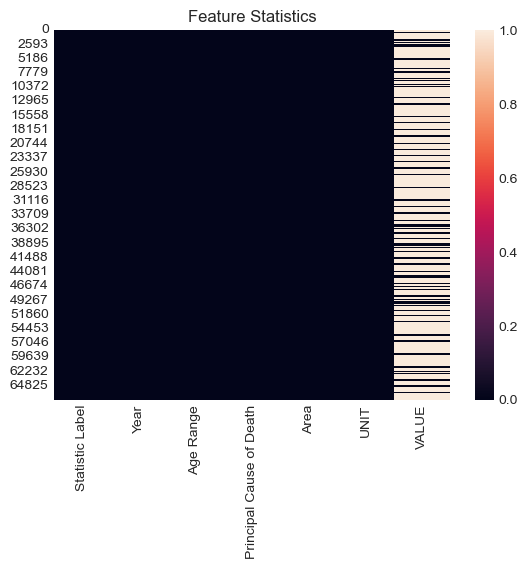

In [83]:
#This heatmap will show a visual representation of the missing value in the dataset
#It is posible to observe there is only one column with missing values = VALUE 
sns.heatmap(Child_mortality.isnull())
plt.title("Feature Statistics")
plt.savefig("Mortality_rate", bbox_inches='tight', pad_inches=0.5)

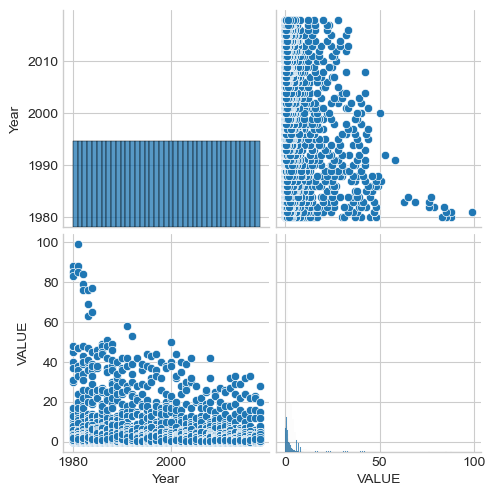

In [84]:
#Using a pairplot to check correlation
#However,there is not a good correlation between numerical variables. 
sns.pairplot(Child_mortality)

In [85]:
#Separating  the data using the loc fuction to select the UNIT Column and split the variable Number and Rate into 2 new dataframes. 

Number = Child_mortality.loc[Child_mortality['UNIT']=='Number']
Rate = Child_mortality.loc[Child_mortality['UNIT']=='Rate' ] 

In [86]:
#Checking new shape of the dataframes created. Now the data was reduce to 33696 rows and 7 columns. Half of the rows of the previous dataset.
Number.shape

(33696, 7)

In [87]:
#Checking new shape of the dataframes created
Rate.shape

(33696, 7)

In [88]:
#Merging the new dataframes created into One using the merge fuction and "on" preposition as references common columns to combine dataframes. 
Mortality_rate = pd.merge(Number, Rate, on=["Year","Age Range","Principal Cause of Death", "Area", ])
Mortality_rate.shape

(33696, 10)

In [89]:
#Checking the 5 first rows of the new dataframe.  
#Posible to observe the columns "Year","Age Range","Principal Cause of Death", "Area" where not duplicated but columns were created for diferents columns.

Mortality_rate.head()

,Statistic Label_x,Year,Age Range,Principal Cause of Death,Area,UNIT_x,VALUE_x,Statistic Label_y,UNIT_y,VALUE_y
0,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,Number,NaN,"Deaths per 1,000 Live Births",Rate,NaN
1,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,Number,5.0,"Deaths per 1,000 Live Births",Rate,0.24
2,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,Number,NaN,"Deaths per 1,000 Live Births",Rate,NaN
3,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,Number,1.0,"Deaths per 1,000 Live Births",Rate,0.71
4,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,Number,NaN,"Deaths per 1,000 Live Births",Rate,NaN


In [90]:
#Using the drop function to eliminate innesesary columns that won't be use it for analysis. 
Mortality_rate = Mortality_rate.drop(["Statistic Label_y", "UNIT_x", "UNIT_y","Statistic Label_x"], axis=1)
Mortality_rate.head()

,Year,Age Range,Principal Cause of Death,Area,VALUE_x,VALUE_y
0,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,NaN,NaN
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.0,0.24
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,NaN,NaN
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.0,0.71
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,NaN,NaN


In [91]:
#Uisng rename fuction to update/rename the name of the columns to have a better description of the values. 

Mortality_rate = Mortality_rate.rename(columns={"Statistic Label_x":"Statistic Label", "VALUE_x": "Number", "VALUE_y":"Rate" })
Mortality_rate.head()

,Year,Age Range,Principal Cause of Death,Area,Number,Rate
0,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,NaN,NaN
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.0,0.24
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,NaN,NaN
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.0,0.71
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,NaN,NaN


In [92]:
#Checking missing values of the new dataset Mortality_rate
#Column Number and Rate has 25685 missing values. 
Mortality_rate.isnull().sum()

Year                            0
Age Range                       0
Principal Cause of Death        0
Area                            0
Number                      25685
Rate                        25685
dtype: int64

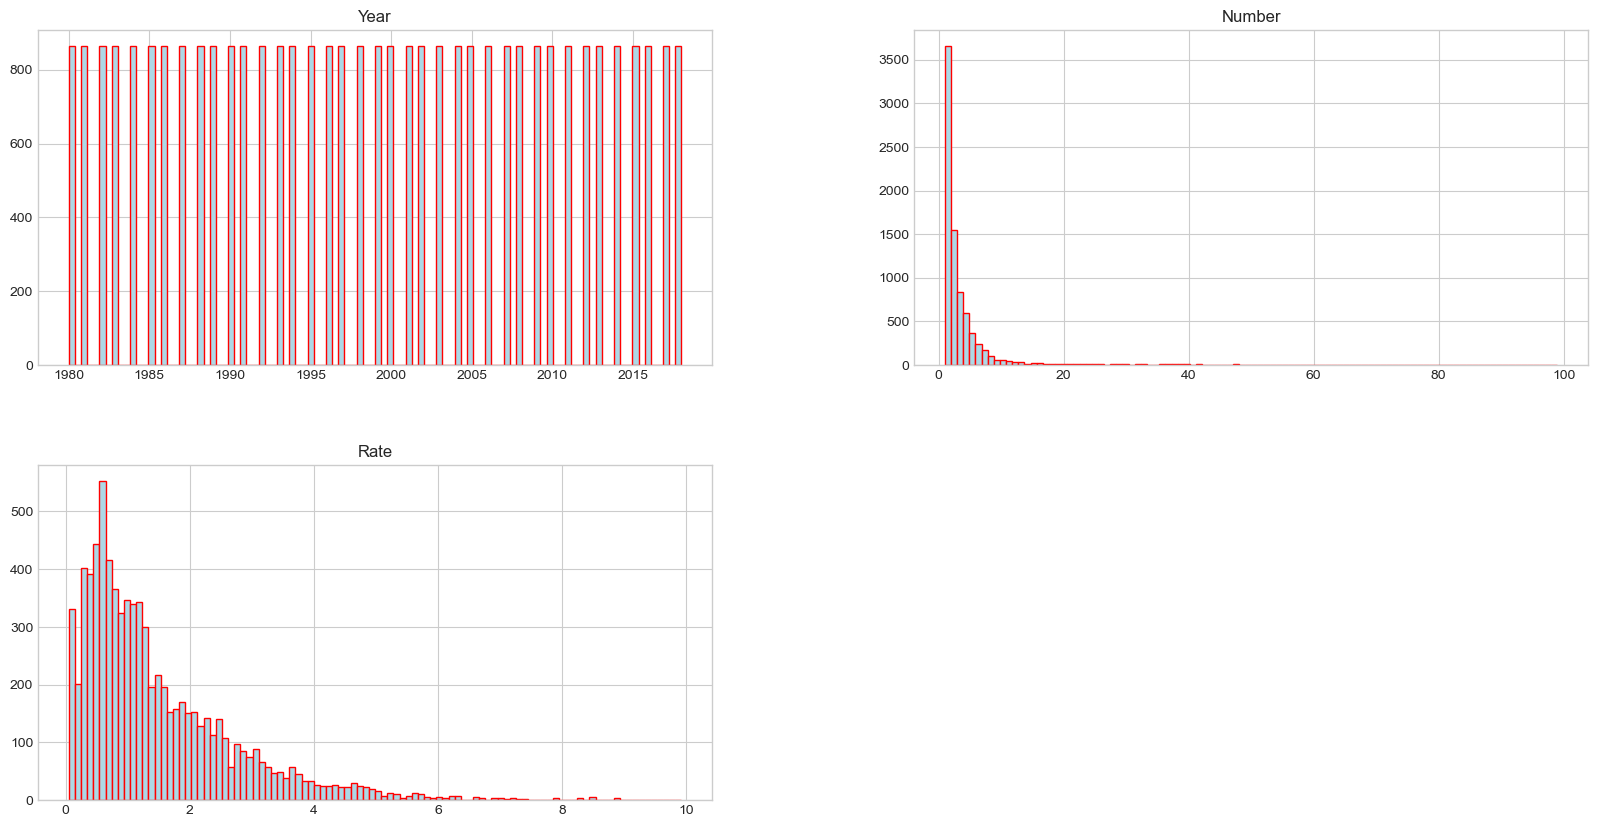

In [93]:
#Checking dustribution of the numerical data using the histograms plots. 
#It is posible to observe the  variables are skewed to the right meaning most of the data are positive values. 
plt.style.use('seaborn-whitegrid')
Mortality_rate.hist(bins=100, figsize=(20,10), color='lightblue', edgecolor = 'red')
plt.show()

In [94]:
#missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
#Child_mortality = pd.read_csv("Infant and Neonatal Mortality.csv", na_values = missing_value_formats,  dtype={'VALUE': float})

# Handling Missing values 

In [95]:
#As the numerical values are skewed to the right the method used to fill the missing values was using the median

#Mortality_rate['Number'].fillna(int(Mortality_rate['Number'].median()), inplace=True)
#print (Mortality_rate['Number'].head())

In [96]:
#Mortality_rate['Rate'].fillna(int(Mortality_rate['Rate'].median()), inplace=True)
#print (Mortality_rate['Rate'].head())

In [97]:
#Using interpolation method to handle missing values. 
#This method was selected as the numerical data is skewed to the rigth side, checking between using the median or the interpolate method the last one had better results as with the median the shape of the data changed completly.  
Mortality_rate['Number'].interpolate(method='linear', direction = 'forward', inplace=True) 
print(Mortality_rate['Number'].head(10)) 

0    NaN
1    5.0
2    3.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: Number, dtype: float64


In [98]:
##Using interpolation to handle missing values
Mortality_rate['Rate'].interpolate(method='linear', direction = 'forward', inplace=True) 
print(Mortality_rate['Rate'].head(10)) 

0      NaN
1    0.240
2    0.475
3    0.710
4    0.645
5    0.580
6    0.515
7    0.450
8    0.560
9    0.670
Name: Rate, dtype: float64


In [99]:
Mortality_rate.isnull().sum()

Year                        0
Age Range                   0
Principal Cause of Death    0
Area                        0
Number                      1
Rate                        1
dtype: int64

In [100]:
Mortality_rate = Mortality_rate.dropna()
Mortality_rate.count() 


Year                        33695
Age Range                   33695
Principal Cause of Death    33695
Area                        33695
Number                      33695
Rate                        33695
dtype: int64

In [101]:
Mortality_rate.head()

,Year,Age Range,Principal Cause of Death,Area,Number,Rate
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.0,0.240
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,3.0,0.475
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.0,0.710
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,1.0,0.645
5,1980,Infant (0-1 year),Infectious and parasitic diseases,Longford,1.0,0.580


In [102]:
Age_range= Mortality_rate['Age Range']
Age_range

1        Infant (0-1 year)
2        Infant (0-1 year)
3        Infant (0-1 year)
4        Infant (0-1 year)
5        Infant (0-1 year)
               ...        
33691    4 weeks to 1 year
33692    4 weeks to 1 year
33693    4 weeks to 1 year
33694    4 weeks to 1 year
33695    4 weeks to 1 year
Name: Age Range, Length: 33695, dtype: object

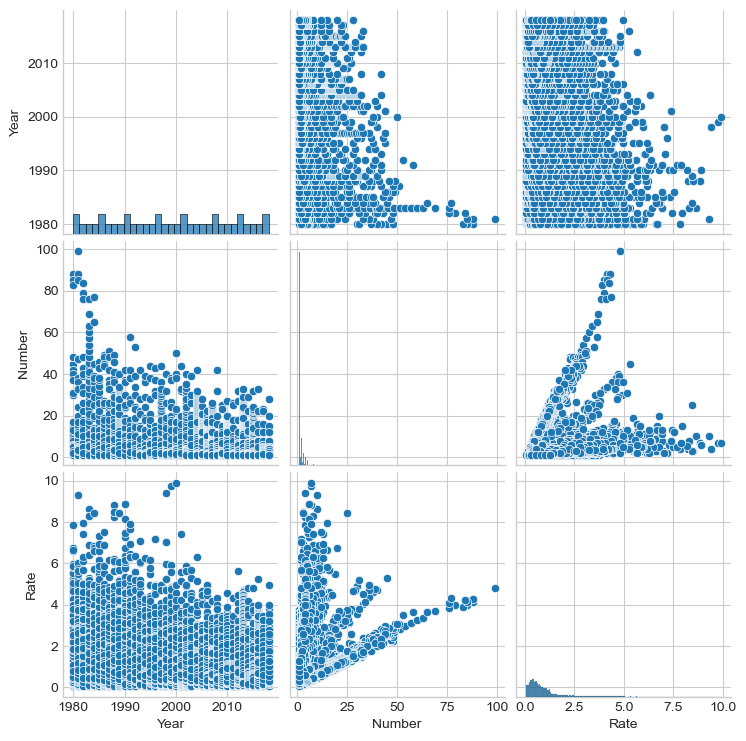

In [103]:
sns.pairplot(Mortality_rate)

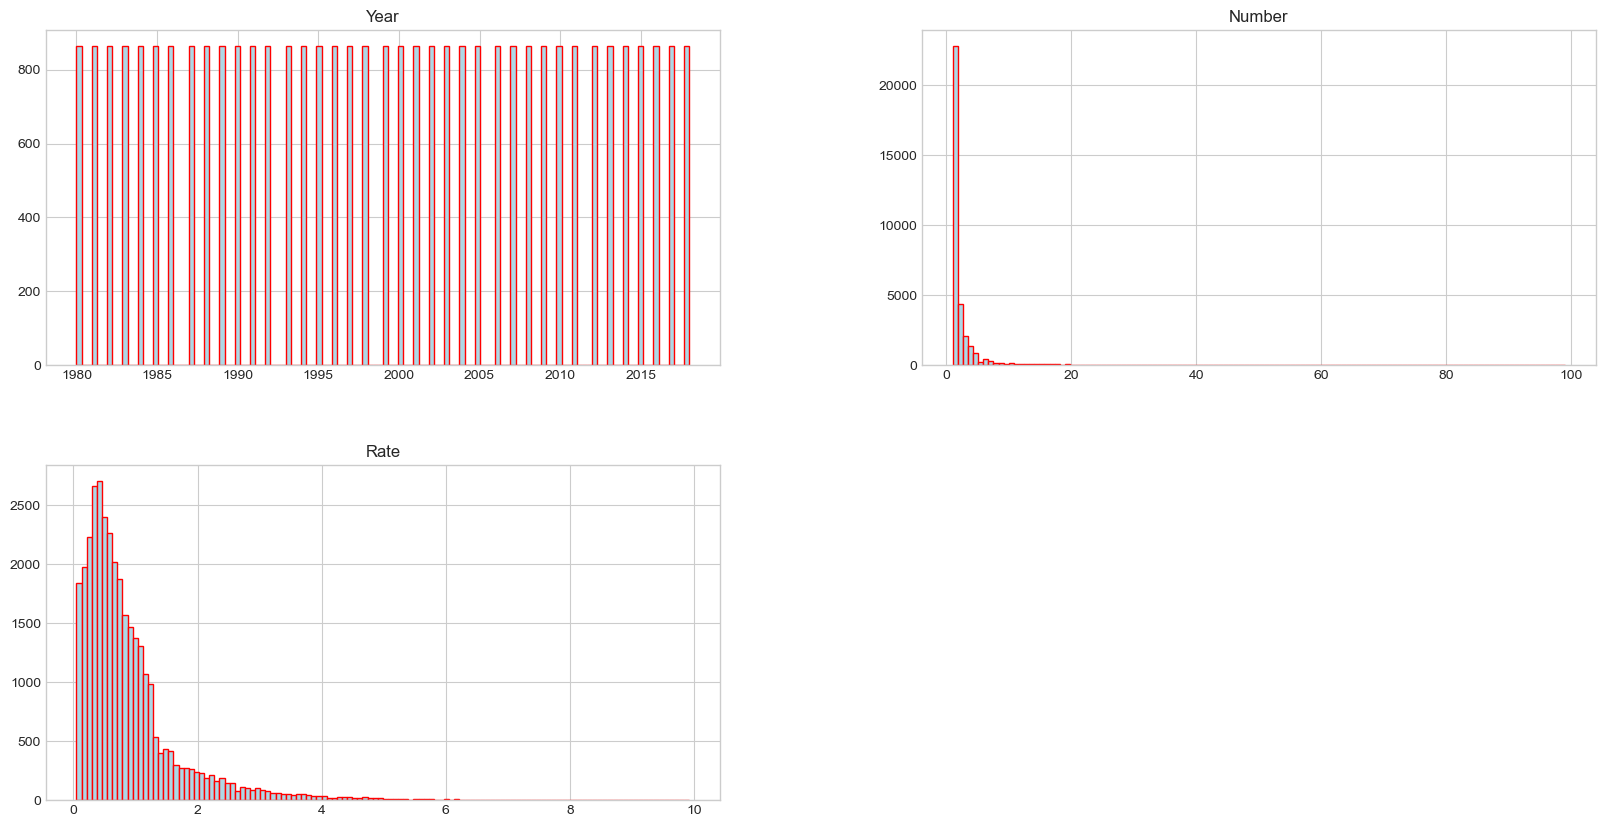

In [104]:
plt.style.use('seaborn-whitegrid')
Mortality_rate.hist(bins=120, figsize=(20,10), color='lightblue', edgecolor = 'red')
plt.show()

# Outliers

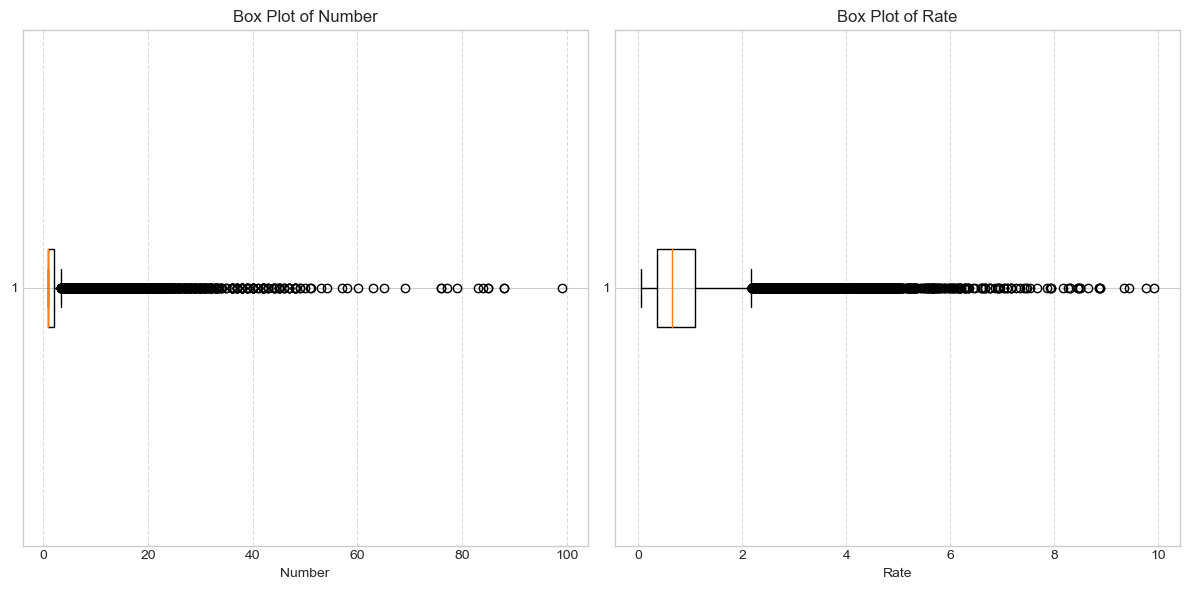

In [105]:
#Checking outliers of the categorical data by using a boxplot to have a visual representation of the outliers in this Columns

plt.figure(figsize=(12, 6))

# Create a box plot for "Rate"
plt.subplot(1, 2, 1)  # Create a subplot for the "Rate" box plot

plt.boxplot(Mortality_rate["Number"], vert=False)
plt.title("Box Plot of Number")
plt.xlabel("Number")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Create a box plot for "Number"
plt.subplot(1, 2, 2)  # Create a subplot for the "Number" box plot
plt.boxplot(Mortality_rate["Rate"], vert=False)
plt.title("Box Plot of Rate")
plt.xlabel("Rate")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Data visualization

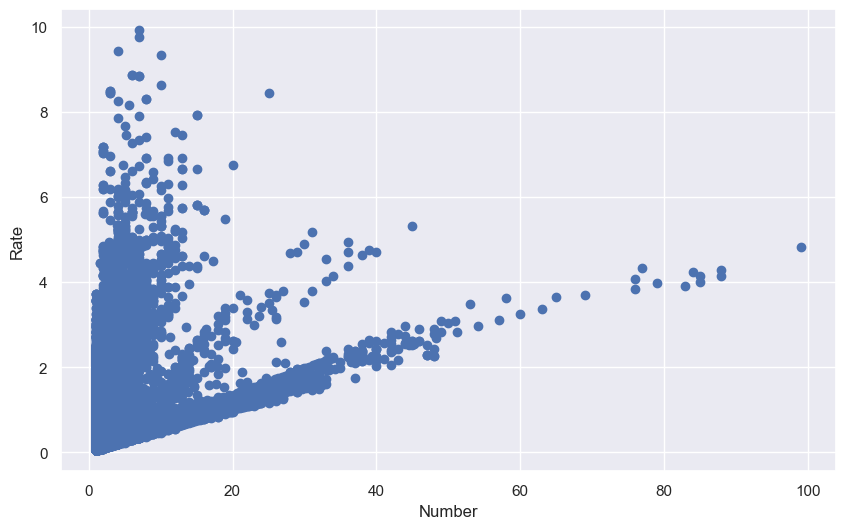

In [125]:
# Plotting a scatter plot 
fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter(Mortality_rate["Number"], Mortality_rate["Rate"]) 
ax.set_xlabel("Number") 
ax.set_ylabel("Rate") 
plt.show() 

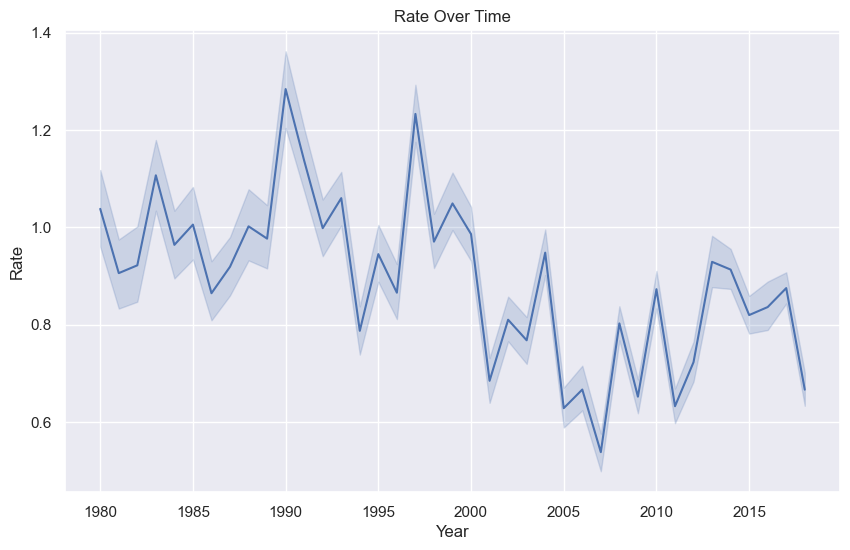

In [146]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Mortality_rate, x="Year", y="Rate")
plt.title("Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Rate")
plt.grid(True)

# Show the plot
plt.show()

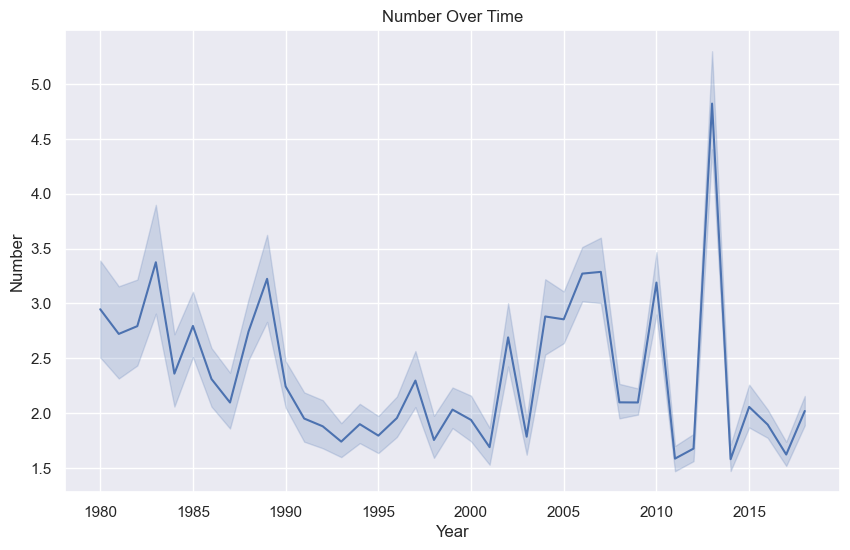

In [147]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Mortality_rate, x="Year", y="Number")
plt.title("Number Over Time")
plt.xlabel("Year")
plt.ylabel("Number")
plt.grid(True)

# Show the plot
plt.show()

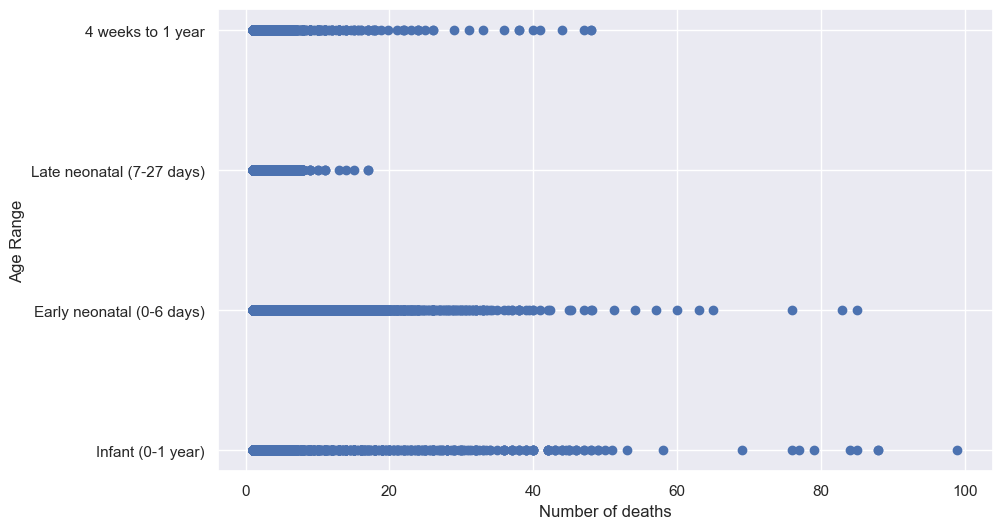

In [126]:
# Plotting a scatter plot 
fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter(Mortality_rate["Number"], Mortality_rate["Age Range"]) 
ax.set_xlabel("Number of deaths") 
ax.set_ylabel("Age Range") 
plt.show() 

In [156]:
cause = Mortality_rate['Principal Cause of Death'].unique()

# Display the first few rows of the 'Principal Cause of Death' column
cause 

array(['Infectious and parasitic diseases', 'Malignant neoplasms',
       'Diseases of the nervous system and the sense organs',
       'Diseases of the circulatory system',
       'Diseases of the respiratory system',
       'Certain conditions originating in the perinatal period (excluding stillbirths)',
       'Congenital malformations and chromosomal abnormalities',
       'Sudden infant death syndrome'], dtype=object)

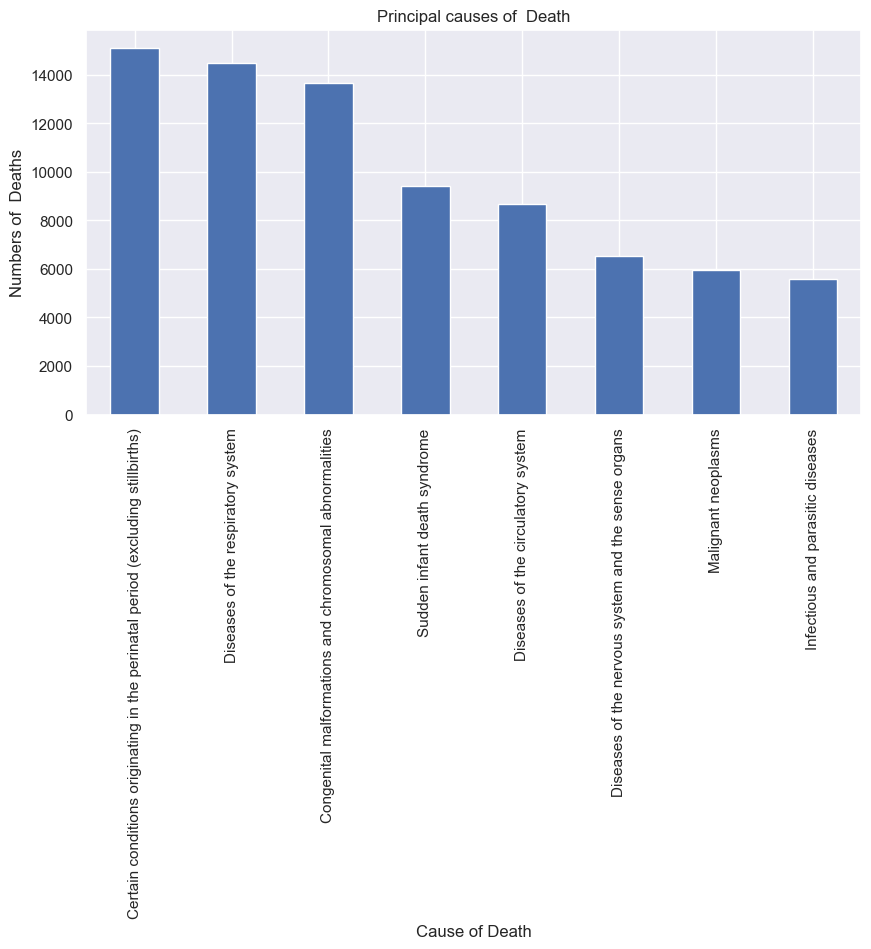

In [158]:
top_causes = Mortality_rate.groupby('Principal Cause of Death')['Number'].sum().nlargest(8)
# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
top_causes.plot(kind='bar')

# Personalizar el título y etiquetas
plt.title("Principal causes of  Death")
plt.ylabel("Numbers of  Deaths")
plt.xlabel("Cause of Death")

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

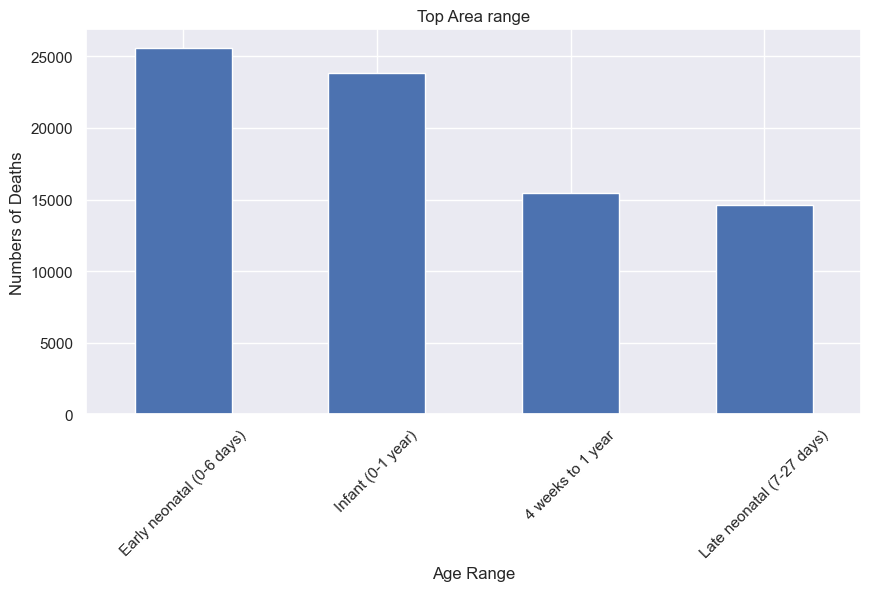

In [149]:
top_causes = Mortality_rate.groupby('Age Range')['Number'].sum().nlargest()
# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
top_causes.plot(kind='bar')

# Personalizar el título y etiquetas
plt.title("Top Area range")
plt.ylabel("Numbers of Deaths")
plt.xlabel("Age Range")

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

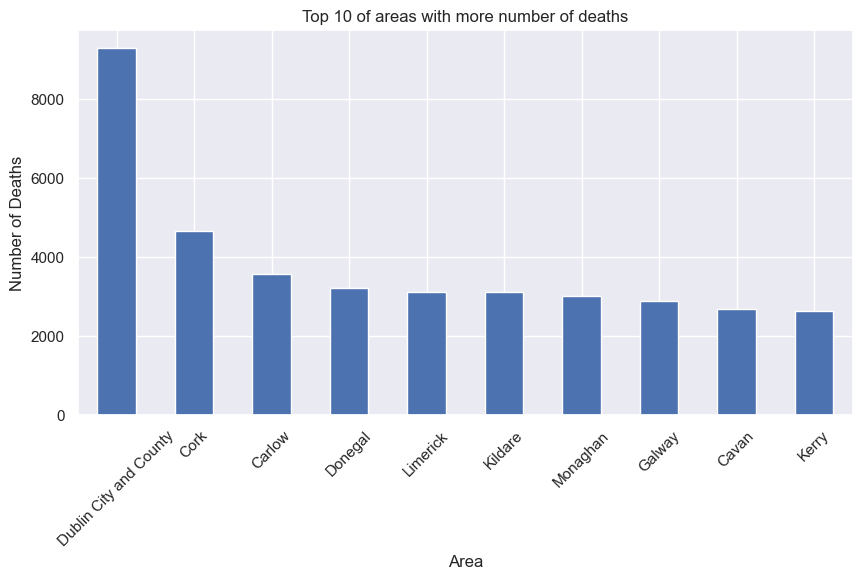

In [150]:
top_causes = Mortality_rate.groupby('Area')['Number'].sum().nlargest(10)
# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
top_causes.plot(kind='bar')

# Personalizar el título y etiquetas
plt.title("Top 10 of areas with more number of deaths")
plt.ylabel("Number of Deaths")
plt.xlabel("Area")

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

<Axes: xlabel='Year', ylabel='Number'>

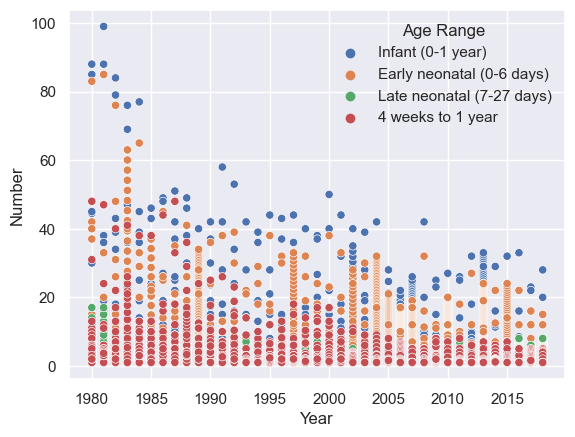

In [124]:
sns.scatterplot(data=Mortality_rate, x="Year", y="Number", hue="Age Range")

# Checking catecorical data

In [39]:
#rates_number =Mortality_rate.select_dtypes("Float64", "int64")
#print(rates_number)

In [40]:
Data_num = Mortality_rate[['Year','Number', 'Rate' ]]
Data_num

,Year,Number,Rate
1,1980,5.0,0.2400
2,1980,3.0,0.4750
3,1980,1.0,0.7100
4,1980,1.0,0.6450
5,1980,1.0,0.5800
...,...,...,...
33691,2018,1.0,1.0425
33692,2018,1.0,1.2900
33693,2018,1.0,1.2900
33694,2018,1.0,1.2900


In [41]:
Mortality_rate_objects =Mortality_rate.select_dtypes(object)
print(Mortality_rate_objects)

               Age Range           Principal Cause of Death  \
1      Infant (0-1 year)  Infectious and parasitic diseases   
2      Infant (0-1 year)  Infectious and parasitic diseases   
3      Infant (0-1 year)  Infectious and parasitic diseases   
4      Infant (0-1 year)  Infectious and parasitic diseases   
5      Infant (0-1 year)  Infectious and parasitic diseases   
...                  ...                                ...   
33691  4 weeks to 1 year       Sudden infant death syndrome   
33692  4 weeks to 1 year       Sudden infant death syndrome   
33693  4 weeks to 1 year       Sudden infant death syndrome   
33694  4 weeks to 1 year       Sudden infant death syndrome   
33695  4 weeks to 1 year       Sudden infant death syndrome   

                         Area  
1      Dublin City and County  
2                     Kildare  
3                    Kilkenny  
4                       Laois  
5                    Longford  
...                       ...  
33691              

In [42]:
#LABEL ENCONDING
from sklearn.preprocessing import LabelEncoder

In [43]:
le =LabelEncoder()

In [44]:
le.fit_transform(Mortality_rate_objects ["Area"])

array([ 5,  8,  9, ...,  1,  4, 17])

In [45]:
for col in Mortality_rate_objects:
    le =LabelEncoder()
    Mortality_rate_objects[col]=le.fit_transform(Mortality_rate_objects[col])
    

In [46]:
Mortality_rate_objects.head(10)

,Age Range,Principal Cause of Death,Area
1,2,5,5
2,2,5,8
3,2,5,9
4,2,5,10
5,2,5,13
6,2,5,14
7,2,5,16
8,2,5,19
9,2,5,24
10,2,5,25


In [47]:
Mortality_rate_objects

,Age Range,Principal Cause of Death,Area
1,2,5,5
2,2,5,8
3,2,5,9
4,2,5,10
5,2,5,13
...,...,...,...
33691,0,7,20
33692,0,7,21
33693,0,7,1
33694,0,7,4


In [48]:
Mortality_rate = pd.merge(Mortality_rate_objects, Data_num, left_index=True, right_index=True, suffixes=("_l", "_r"))
Mortality_rate.head()

,Age Range,Principal Cause of Death,Area,Year,Number,Rate
1,2,5,5,1980,5.0,0.240
2,2,5,8,1980,3.0,0.475
3,2,5,9,1980,1.0,0.710
4,2,5,10,1980,1.0,0.645
5,2,5,13,1980,1.0,0.580


In [49]:
Mortality_rate.shape

(33695, 6)

## Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
min_max =MinMaxScaler()

In [52]:
Mortality_rate_minmax =pd.DataFrame(min_max.fit_transform(Mortality_rate), columns=Mortality_rate.columns )

In [53]:
Mortality_rate_minmax.head()

,Age Range,Principal Cause of Death,Area,Year,Number,Rate
0,0.666667,0.714286,0.192308,0.0,0.040816,0.019250
1,0.666667,0.714286,0.307692,0.0,0.020408,0.043060
2,0.666667,0.714286,0.346154,0.0,0.000000,0.066869
3,0.666667,0.714286,0.384615,0.0,0.000000,0.060284
4,0.666667,0.714286,0.500000,0.0,0.000000,0.053698


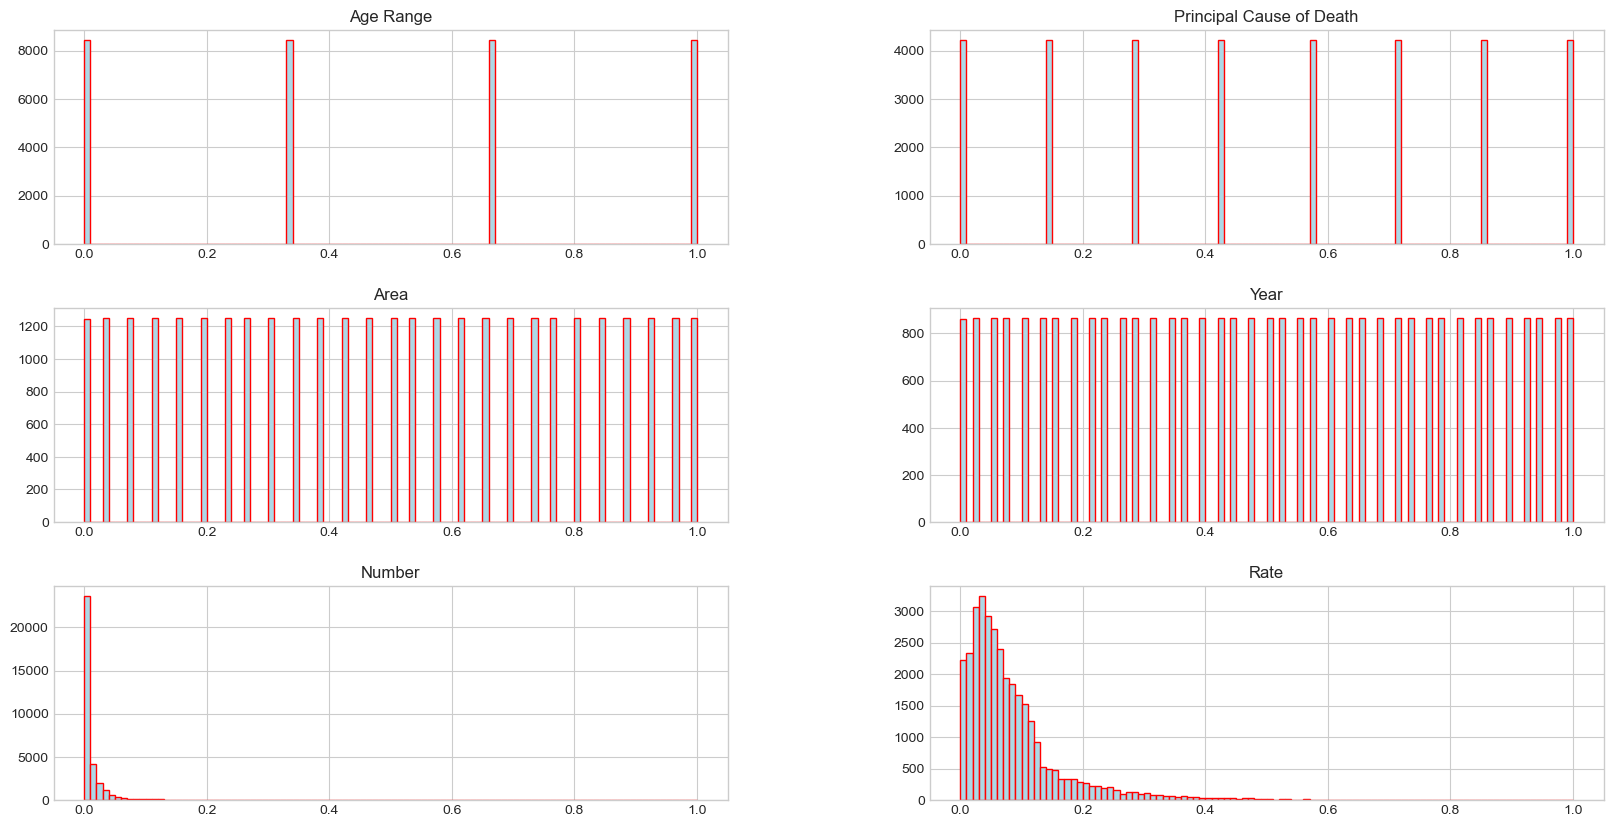

In [54]:
plt.style.use('seaborn-whitegrid')
Mortality_rate_minmax.hist(bins=100, figsize=(20,10), color='lightblue', edgecolor = 'red')
plt.show()

# Machine Learning

## KNN

In [55]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
X = Mortality_rate_minmax .drop(["Rate"], axis=1, ).values
y = Mortality_rate_minmax  ["Rate"].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [58]:
clf= KNeighborsRegressor(6)
clf.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [59]:
#model evaluation

In [60]:
y_predict=clf.predict(X_test)
print(mean_squared_error(y_test, y_predict))

0.0035484194608903855


In [61]:
neighbors = np.arange(1, 10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


In [62]:
# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.0035484194608903855
R-squared (R2) Score: 0.5215575858755946


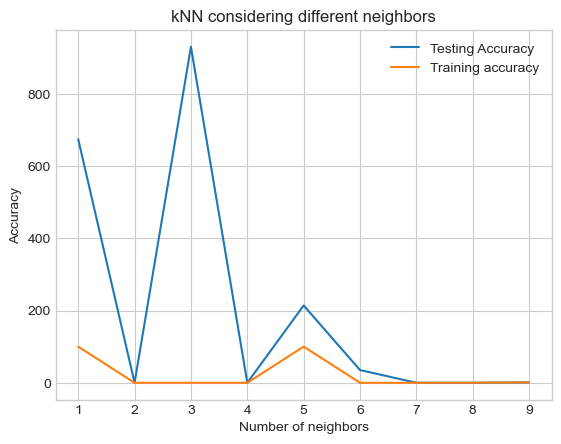

In [63]:
plt.title('kNN considering different neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [64]:
Mortality_rate.head()

,Age Range,Principal Cause of Death,Area,Year,Number,Rate
1,2,5,5,1980,5.0,0.240
2,2,5,8,1980,3.0,0.475
3,2,5,9,1980,1.0,0.710
4,2,5,10,1980,1.0,0.645
5,2,5,13,1980,1.0,0.580


## Random forest Regression

In [65]:
# Declaration of Varaibles
X = Mortality_rate_minmax.drop(["Rate"], axis=1, )
y = Mortality_rate_minmax["Rate"]              # Store last column into an array (y)

# Use train_test_split method to split the data into 40% and 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [66]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor

# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion='squared_error',  # Change 'mse' to 'squared_error'
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.979, test: 0.832


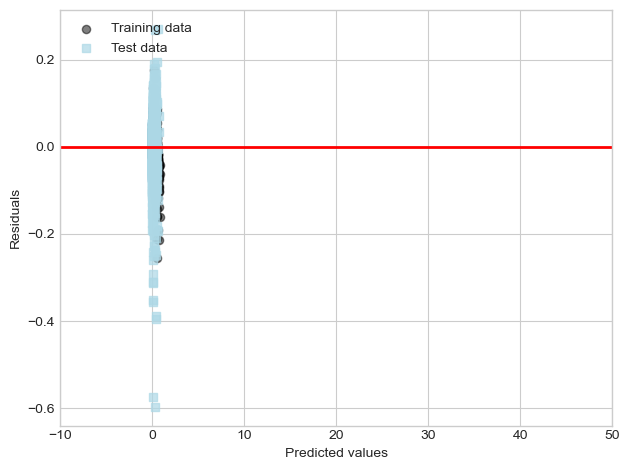

In [67]:
# Draw a scatter plot
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c = 'black', 
            marker = 'o', 
            s = 35,
            alpha = 0.5,
            label = 'Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c = 'lightblue', 
            marker = 's', 
            s = 35,
            alpha = 0.7,
            label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

### Cross validation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Crear un objeto RandomForestRegressor con tus hiperparámetros
forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error', random_state=1, n_jobs=-1)

# Realizar validación cruzada en el conjunto de entrenamiento
cv_scores = cross_val_score(forest, X_train, y_train, cv=5)  # Aquí cv=5 indica 5-fold cross-validation

# Imprimir los resultados de la validación cruzada
print('Resultados de la validación cruzada:')
print('R^2 medio: %.3f' % np.mean(cv_scores))
print('Desviación estándar: %.3f' % np.std(cv_scores))

In [ ]:
#cross_val_score(cross_val_score(forest, X_train, y_train, scoring='accuracy', cv=30).mean())

# Data visualization

In [ ]:
sns.barplot(x="Age Range", y="Number", data=Mortality_rate)
plt.xticks(rotation=45)  # Rotate x-axis labels

# Show the first plot
plt.show()

# Create a barplot for 'Rate' column
sns.barplot(x="Age Range", y="Rate", data=Mortality_rate)
plt.xticks(rotation=45)  # Rotate x-axis labels

# Show the second plot
plt.show()

In [ ]:
sns.lineplot(data=Mortality_rate, x="Year", y="Number", hue="Age Range")

In [ ]:
sns.lineplot(data=Mortality_rate, x="Year", y="Rate", hue="Age Range", errorbar=None)

In [ ]:
sns.lineplot(data=Mortality_rate, x="Area", y="Number", hue="Age Range")
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.lineplot(data=Mortality_rate, x="Area", y="Rate", hue="Age Range")
plt.xticks(rotation=90)
plt.show()